In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fp = 'https://bit.ly/bitcoin-purchases2'

df = pd.read_csv(fp)
df.sample(8)

,bitcoin address,wire amount,credit card
158,14LAkibNbXYKbwtjEfJXvZtRmJeWwJkBVv,£7965.64,201537298979152
889,1HDfLUQdzPa8kDgm8gGDZFApNjP1pZt6zu,"€478,79",3583901936204146
264,1JBki2zYRjmFNy1V8S62LS7jDRu5jjcteD,"€5329,54",3532198800110739
898,1B6KvEWx92NTuD7qNFdG6HXv7YQkkXEefQ,£8103.13,36031162883121
935,19y9NT1rytMQwBkUiYAkiK6omkWPfUBjxt,$896.61,201426778070072
100,1PRZ7BpYzU8PaeGLFWco3TDeUDw7MKFqaV,$7668.00,3581187434359499
290,153cDVZqJ6SCtDd6twrjBZEg4a6q96scHs,£1775.17,3568317201624687
182,1M2xd7rXDK5oxiYmiUgTwzBGGb9MuawCDH,$2146.02,3549069075210481


In [3]:
df.shape

(1000, 3)

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['bitcoin_address', 'wire_amount', 'credit_card'], dtype='object')

In [5]:
df['currency'] = df['wire_amount'].str[0]

In [6]:
df['wire_amount'] = df['wire_amount'].str.replace(',', '.').str[1:].astype(float)

In [7]:
df.head()

,bitcoin_address,wire_amount,credit_card,currency
0,1J9DVMtgvnPv4KGHL2XSzoTSt5cBBL1DXe,8356.92,3543456448666398,£
1,1HaiVQbzCTs7t1K1fckYEUi9t8ERBFRR7Q,311.06,3584615208479876,€
2,1NGPjXfDScEUSZYajAzCkxaVApTbBHC7jP,2032.44,6370577480710876,€
3,15cSYRTbcrxYinxNxk7VbkPLZG8nypdjy6,8155.74,4508652385157398,¥
4,18j2qG1DH9YduJiBiccAq8Ak897G3E4JyZ,3265.44,374622922103592,£


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bitcoin_address  1000 non-null   object 
 1   wire_amount      1000 non-null   float64
 2   credit_card      1000 non-null   int64  
 3   currency         1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


# Categorical 1

In [10]:
fp = 'https://bit.ly/felonies-dataset'
df = pd.read_csv(fp)
df.head()

,Date of Arrest,Age,Convicted
0,2014-07-16 14:59:18,77,Yes
1,2002-12-19 22:17:59,28,Yes
2,1994-06-28 09:31:40,21,No
3,1985-05-14 09:52:17,45,Yes
4,1985-05-25 14:06:28,39,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date of Arrest  1000 non-null   object
 1   Age             1000 non-null   int64 
 2   Convicted       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [12]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['date_of_arrest', 'age', 'convicted'], dtype='object')

In [13]:
df.age.describe()

count    1000.000000
mean       54.605000
std        25.225172
min        10.000000
25%        33.000000
50%        53.000000
75%        76.000000
max        99.000000
Name: age, dtype: float64

childhood 0 - 13
adolescence 14 - 20
adult 21 - 65
senior 66 - 100

In [30]:
df['face_of_age'] = pd.cut(
    df['age'],
    bins=[9, 13, 20, 65, 99],
    labels=['child', 'ado', 'adult', 'senior']
)

In [31]:
df.sample(10)

,date_of_arrest,age,convicted,face_of_age
740,1978-09-21 16:42:38,55,No,adult
488,1970-01-18 07:12:55,72,Yes,senior
105,1982-06-06 18:38:41,73,No,senior
107,1989-05-17 04:10:58,23,No,adult
17,1997-04-26 00:49:21,13,No,child
191,1986-11-24 08:57:58,41,Yes,adult
243,1979-11-08 13:24:30,39,Yes,adult
141,1973-03-31 23:46:18,52,No,adult
483,1994-10-28 00:59:14,66,Yes,senior
998,1999-07-05 17:16:12,27,No,adult


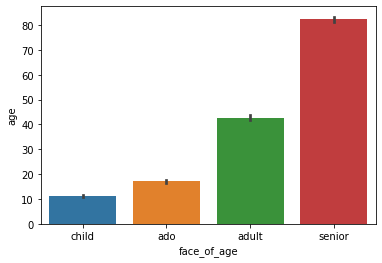

In [32]:
sns.barplot(x='face_of_age', y='age', data=df)

In [33]:
df.groupby(['face_of_age']).sum()['age']

face_of_age
child       397
ado        1092
adult     22820
senior    30296
Name: age, dtype: int64

<Figure size 1260x525 with 0 Axes>

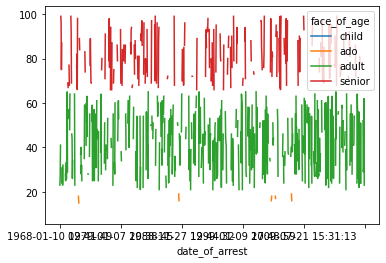

In [29]:
plt.figure(figsize=(12, 5), dpi=105)
df.groupby(['date_of_arrest','face_of_age']).mean()['age'].unstack().plot();

In [39]:
labels = ['tenties', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties', 'nineties']
df['decade'] = pd.cut(
    df['age'],
    bins=[9, 20, 30, 40, 50, 60, 70, 80, 90, 99],
    labels = labels
)

In [40]:
df.head()

,date_of_arrest,age,convicted,face_of_age,decade
0,2014-07-16 14:59:18,77,Yes,senior,seventies
1,2002-12-19 22:17:59,28,Yes,adult,twenties
2,1994-06-28 09:31:40,21,No,adult,twenties
3,1985-05-14 09:52:17,45,Yes,adult,forties
4,1985-05-25 14:06:28,39,Yes,adult,thirties


# Dates

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date_of_arrest  1000 non-null   object  
 1   age             1000 non-null   int64   
 2   convicted       1000 non-null   object  
 3   face_of_age     1000 non-null   category
 4   decade          1000 non-null   category
dtypes: category(2), int64(1), object(2)
memory usage: 26.1+ KB


In [43]:
df['date_of_arrest'] = pd.to_datetime(df.date_of_arrest)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_of_arrest  1000 non-null   datetime64[ns]
 1   age             1000 non-null   int64         
 2   convicted       1000 non-null   object        
 3   face_of_age     1000 non-null   category      
 4   decade          1000 non-null   category      
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 26.1+ KB


In [53]:
df.groupby(['day', 'convicted']).sum()['age']

day  convicted
Fri  No            2264
     Yes           5860
Mon  No            2357
     Yes           4865
Sat  No            2471
     Yes           4227
Thr  No            2854
     Yes           5777
Tue  No            5621
     Yes          10541
Wen  No            3001
     Yes           4767
Name: age, dtype: int64

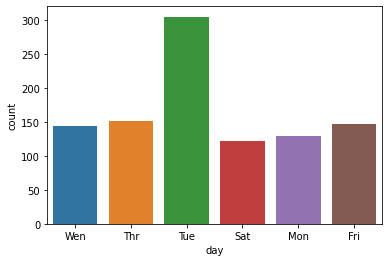

In [54]:
sns.countplot(x='day', data=df)

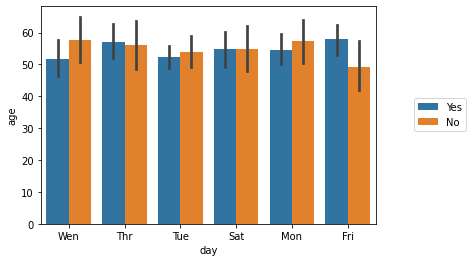

In [58]:
sns.barplot(x='day', y='age', hue='convicted', data=df)
plt.legend(bbox_to_anchor=(1.1, 0.6))

In [88]:
from datetime import datetime

year = lambda y: datetime(year=y, month=1, day=1)
date = lambda yr: yr.strftime('%d, %b %Y')

date(df.date_of_arrest.min()), date(df.date_of_arrest.max())

('10, Jan 1968', '28, Jan 2020')

In [89]:
df['period'] = pd.cut(
    df['date_of_arrest'],
    bins=[year(1968),year(1975),year(1990),year(2010),year(2021)],
    labels=[f"period_{i}" for i in range(1, 5)]
)

In [90]:
df.sample(5)

,date_of_arrest,age,convicted,face_of_age,decade,day,period
125,1973-09-02 19:33:12,55,No,adult,fifties,Tue,period_1
298,2015-09-17 06:14:46,19,Yes,ado,tenties,Thr,period_4
528,2007-10-17 02:22:24,98,Yes,senior,nineties,Wen,period_3
251,2002-04-04 18:35:26,82,Yes,senior,eighties,Thr,period_3
688,2010-05-20 14:15:29,35,Yes,adult,thirties,Thr,period_4


In [92]:
day_of_week_lst = ['Mon', 'Tue', 'Wen', 'Thr', 'Fri', 'Sat', 'Sun']
numtoday = {k:v for k, v in enumerate(day_of_week_lst)}
numtoday

{0: 'Mon', 1: 'Tue', 2: 'Wen', 3: 'Thr', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [97]:
df['day'] = df.date_of_arrest.dt.dayofweek.map(numtoday)

In [98]:
df.head()

,date_of_arrest,age,convicted,face_of_age,decade,day,period
0,2014-07-16 14:59:18,77,Yes,senior,seventies,Wen,period_4
1,2002-12-19 22:17:59,28,Yes,adult,twenties,Thr,period_3
2,1994-06-28 09:31:40,21,No,adult,twenties,Tue,period_3
3,1985-05-14 09:52:17,45,Yes,adult,forties,Tue,period_2
4,1985-05-25 14:06:28,39,Yes,adult,thirties,Sat,period_2


In [99]:
df.groupby(['day']).sum()

,age
day,
Fri,8124
Mon,7222
Sat,6698
Sun,8166
Thr,8631
Tue,7996
Wen,7768


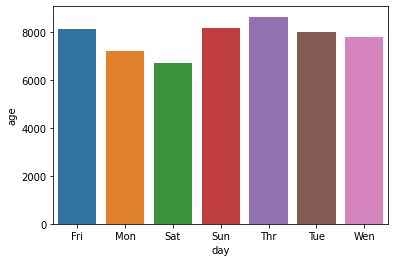

In [102]:
sns.barplot(x='day', y='age', data=df.groupby(['day']).sum().reset_index())

In [100]:
df.day.value_counts()

Sun    158
Thr    152
Tue    147
Fri    147
Wen    144
Mon    130
Sat    122
Name: day, dtype: int64

In [111]:
# week end: Sat Sun, Middle: wen-thr-fri, beg: mon, tue
df['week_period'] = pd.cut(
    df['date_of_arrest'].dt.day_of_week,
    bins=[-1, 1, 4, 6],
    labels=['workWeekBegan', 'workWeekMiddle', 'weekend']
)

In [112]:
df.sample(10)

,date_of_arrest,age,convicted,face_of_age,decade,day,period,week_period
905,2005-03-23 12:53:30,46,No,adult,forties,Wen,period_3,workWeekMiddle
349,1986-05-04 15:13:53,36,Yes,adult,thirties,Sun,period_2,weekend
653,1982-09-07 12:35:28,74,No,senior,seventies,Tue,period_2,workWeekBegan
503,1994-06-13 07:12:03,87,No,senior,eighties,Mon,period_3,workWeekBegan
215,1996-03-18 09:21:37,22,Yes,adult,twenties,Mon,period_3,workWeekBegan
55,2013-06-27 19:21:45,95,Yes,senior,nineties,Thr,period_4,workWeekMiddle
264,2009-08-23 17:38:25,37,Yes,adult,thirties,Sun,period_3,weekend
592,1980-01-11 22:36:29,78,Yes,senior,seventies,Fri,period_2,workWeekMiddle
458,1973-02-17 15:44:57,69,Yes,senior,sixties,Sat,period_1,weekend
556,1989-09-19 12:02:45,44,Yes,adult,forties,Tue,period_2,workWeekBegan


In [113]:
df.groupby(['week_period']).sum()

,age
week_period,
workWeekBegan,15218
workWeekMiddle,24523
weekend,14864


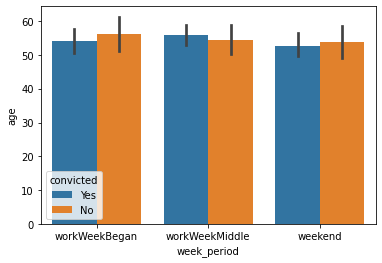

In [115]:
sns.barplot(x='week_period', y='age', data=df, hue='convicted')

In [126]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
month_category = ['second_semester', 'holidays','first_semester']
id2month = {k:v for k,v in enumerate(months, 1)}
# month2cat = {k:v for k,v in enumerate(month_category)}
df['months'] = df.date_of_arrest.dt.month.map(id2month)

df['months_period'] = pd.cut(
    df.date_of_arrest.dt.month,
    bins=[-1,5,8,12],
    labels=month_category
)

In [127]:
df.sample(10)

,date_of_arrest,age,convicted,face_of_age,decade,day,period,week_period,months,months_period
173,1979-07-03 03:22:50,64,Yes,adult,sixties,Tue,period_2,workWeekBegan,July,holidays
699,1986-04-06 18:18:44,19,Yes,ado,tenties,Sun,period_2,weekend,April,second_semester
633,2006-11-19 12:10:42,49,No,adult,forties,Sun,period_3,weekend,November,first_semester
862,2001-03-18 22:16:06,44,Yes,adult,forties,Sun,period_3,weekend,March,second_semester
118,2013-03-30 03:25:26,26,Yes,adult,twenties,Sat,period_4,weekend,March,second_semester
641,1971-06-22 11:27:54,25,Yes,adult,twenties,Tue,period_1,workWeekBegan,June,holidays
63,2018-09-19 12:52:05,76,Yes,senior,seventies,Wen,period_4,workWeekMiddle,September,first_semester
156,2012-11-16 13:16:36,48,Yes,adult,forties,Fri,period_4,workWeekMiddle,November,first_semester
195,1991-02-12 20:51:23,44,Yes,adult,forties,Tue,period_3,workWeekBegan,February,second_semester
615,1993-10-28 05:17:43,33,Yes,adult,thirties,Thr,period_3,workWeekMiddle,October,first_semester
